# Data and Setup

In [2]:
!pip install plotly
!pip install cufflinks
!pip install chart-studio

In [87]:
from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt


In [55]:
df = pd.read_csv('C:/Users/vidsw/Desktop/911.csv', index_col=None)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [57]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Questions

In [58]:
s = df['zip'].value_counts()

In [59]:
s.head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [60]:
t = s = df['twp'].value_counts()

In [61]:
t.head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [62]:
df['title'].nunique()

148

# Creating new features

In [63]:
df['Reasons'] = df['title'].apply(lambda x: x.split(':')[0]) 

In [64]:
df['Reasons'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reasons, dtype: object

In [65]:
u = df['Reasons'].value_counts()

In [66]:
u.head()

EMS        332692
Traffic    230208
Fire       100622
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

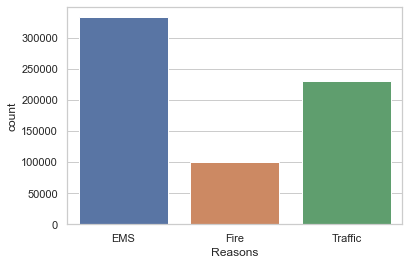

In [67]:
sns.countplot(x='Reasons',data=df)

In [68]:
df['timeStamp'].dtypes

dtype('O')

In [69]:
df['dateTime'] = pd.to_datetime(df['timeStamp'])

In [70]:
df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp            object
twp                  object
addr                 object
e                     int64
Reasons              object
dateTime     datetime64[ns]
dtype: object

In [74]:
df['hour'] = df['dateTime'].dt.hour

In [76]:
df['day_of_week'] = df['dateTime'].dt.weekday

In [77]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,dateTime,month_of_date,hour,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,12,14,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,12,16,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,12,16,3


In [78]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [79]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,dateTime,month_of_date,hour,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,12,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,12,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,12,14,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,12,16,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,12,16,Thu


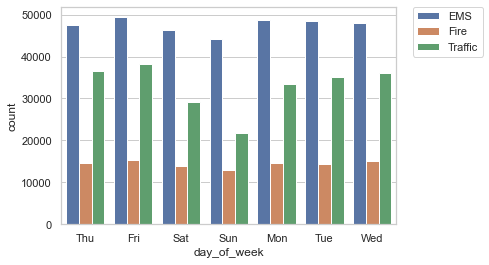

In [91]:
sns.countplot(x="day_of_week", hue = "Reasons", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

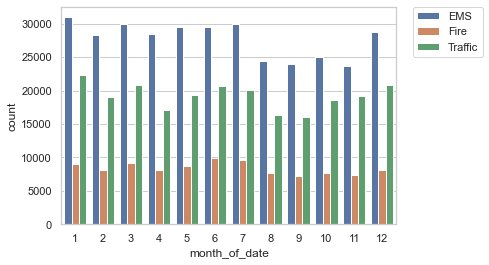

In [93]:
sns.countplot(x="month_of_date", hue = "Reasons", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [94]:
byMonth = df.groupby('month_of_date').count() 

In [95]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,dateTime,hour,day_of_week
month_of_date,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='month_of_date'>

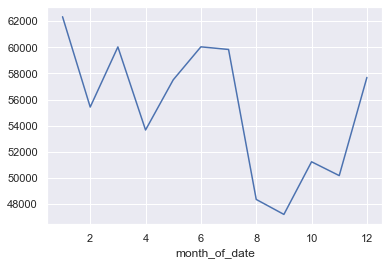

In [110]:
result = df.groupby(['month_of_date']).size()
 
# plot the result
sns.lineplot(x = result.index, y = result.values)

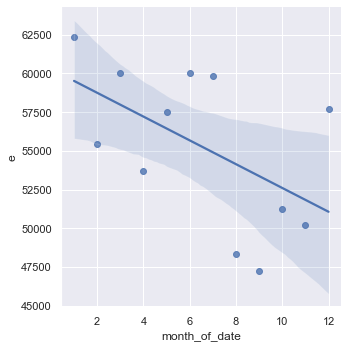

In [114]:
df_2 = df.groupby('month_of_date').sum()
df_2.reset_index(inplace=True)
sns.lmplot(x='month_of_date', y='e', data=df_2);


In [115]:
df['just_date'] = df['dateTime'].dt.date

In [116]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,dateTime,month_of_date,hour,day_of_week,just_date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,12,17,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,12,17,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,12,14,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,12,16,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,12,16,Thu,2015-12-10


<AxesSubplot:xlabel='just_date'>

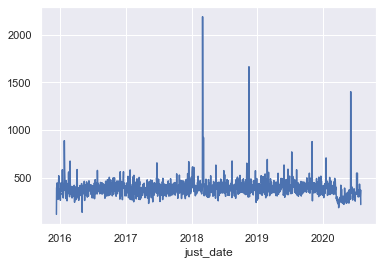

In [117]:
result = df.groupby(['just_date']).size()
 
# plot the result
sns.lineplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='just_date'>

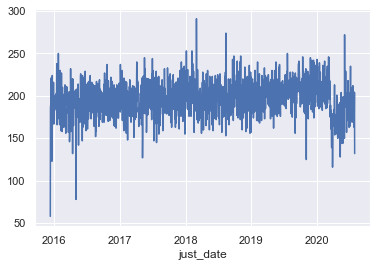

In [131]:
result = df.loc[df['Reasons'] == 'EMS']
result = result.groupby(['just_date']).size()
#df.groupby('column').filter(lambda group: group.size > X) 
# plot the result
sns.lineplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='just_date'>

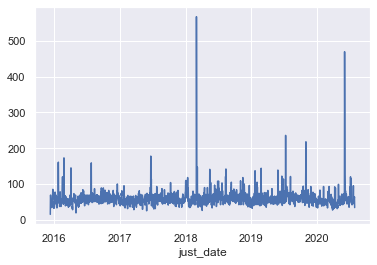

In [132]:
result = df.loc[df['Reasons'] == 'Fire']
result = result.groupby(['just_date']).size()
#df.groupby('column').filter(lambda group: group.size > X) 
# plot the result
sns.lineplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='just_date'>

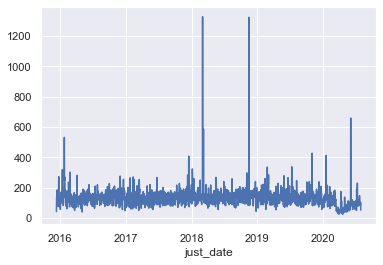

In [133]:
result = df.loc[df['Reasons'] == 'Traffic']
result = result.groupby(['just_date']).size()
#df.groupby('column').filter(lambda group: group.size > X) 
# plot the result
sns.lineplot(x = result.index, y = result.values)

In [139]:
df_m = df.groupby(["hour", "day_of_week"]).size().unstack(level=0)

df_m

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

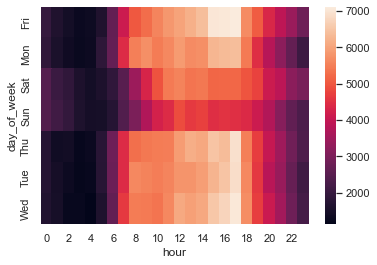

In [140]:
df_m = df.groupby(["hour", "day_of_week"]).size().unstack(level=0)

sns.heatmap(df_m)

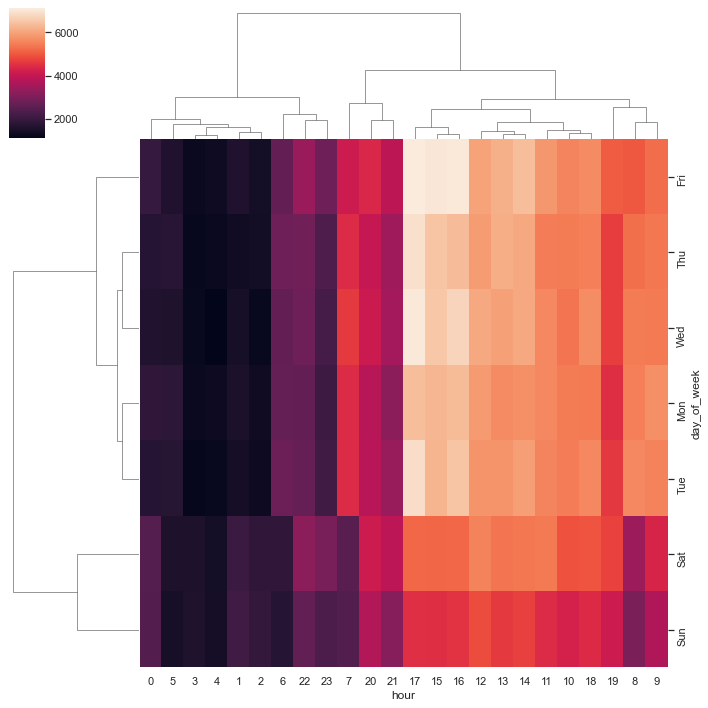

In [141]:
df_m = df.groupby(["hour", "day_of_week"]).size().unstack(level=0)

sns.clustermap(df_m)

In [143]:
df_m = df.groupby(["month_of_date", "day_of_week"]).size().unstack(level=0)

df_m

month_of_date,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<AxesSubplot:xlabel='month_of_date', ylabel='day_of_week'>

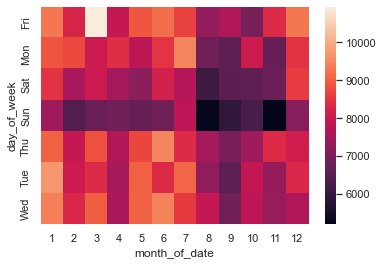

In [144]:
df_m = df.groupby(["month_of_date", "day_of_week"]).size().unstack(level=0)

sns.heatmap(df_m)

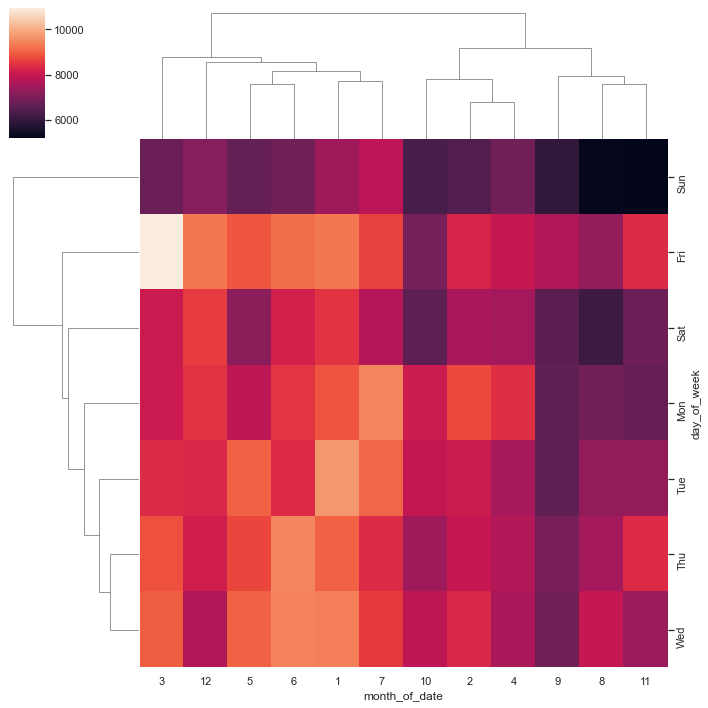

In [145]:
df_m = df.groupby(["month_of_date", "day_of_week"]).size().unstack(level=0)

sns.clustermap(df_m)